In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [22]:
data = pd.read_csv('classdata.csv')

In [29]:
data.shape

(215, 15)

In [25]:
data['salary'].mean()

288655.4054054054

In [27]:
data['ssc_p'].mean()

67.30339534883721

In [30]:
placed_data = data[data['status'] == 'Placed']

In [ ]:
### EDA

In [31]:
placed_data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

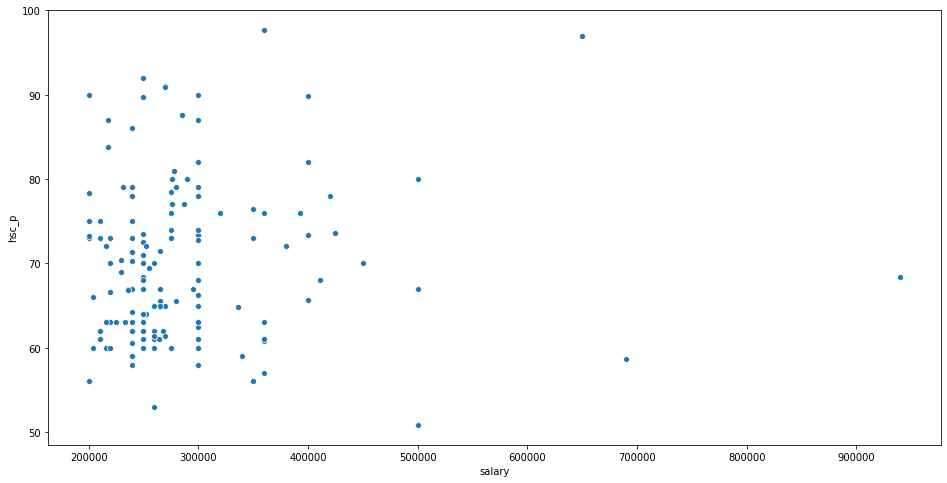

In [35]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=placed_data['salary'], y=placed_data['hsc_p'])

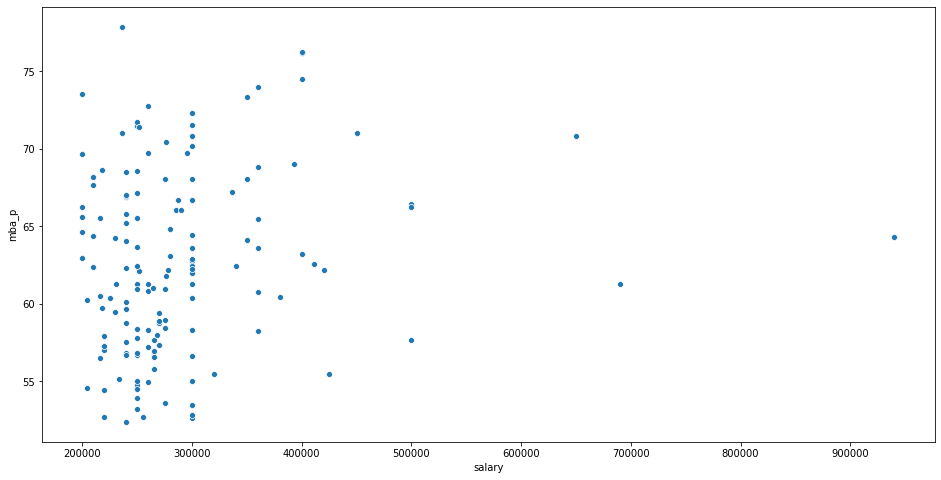

In [38]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=placed_data['salary'], y=placed_data['mba_p'])

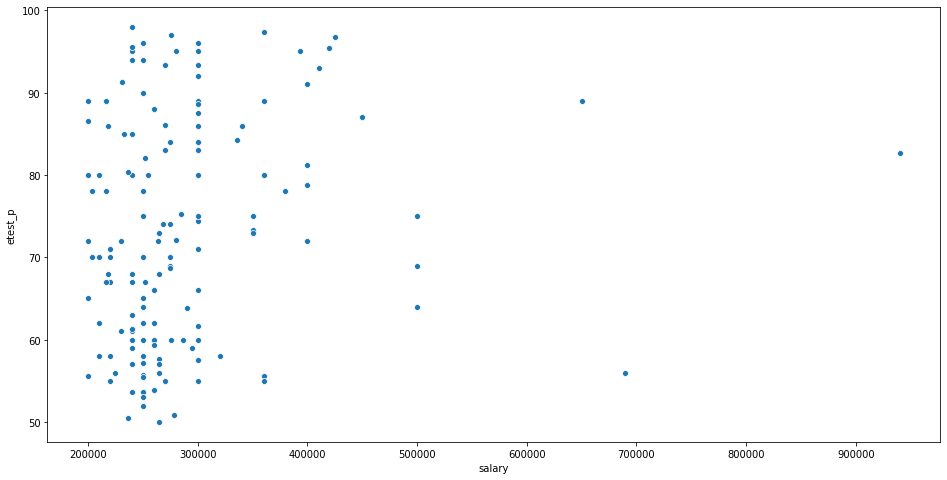

In [39]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=placed_data['salary'], y=placed_data['etest_p'])

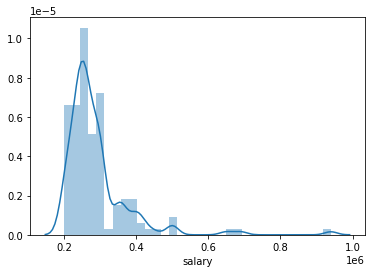

In [41]:
sns.distplot(placed_data['salary'])

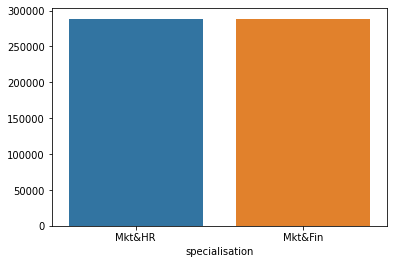

In [43]:
sns.barplot(x=placed_data['specialisation'], y=placed_data['salary'].mean())

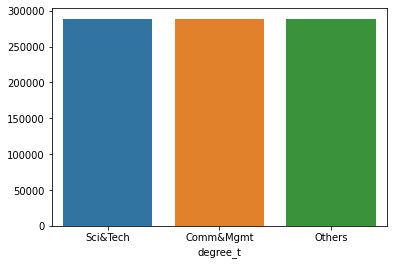

In [45]:
sns.barplot(x=placed_data['degree_t'], y=placed_data['salary'].mean())

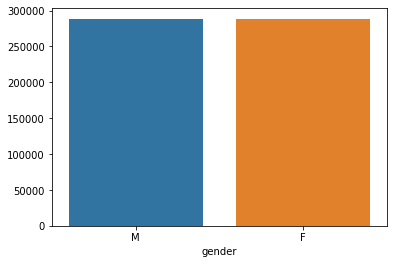

In [46]:
sns.barplot(x=placed_data['gender'], y= placed_data['salary'].mean())

In [49]:
placed_data.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.093480,-0.218428,-0.102250,0.041467,-0.072432,0.063764
ssc_p,-0.093480,1.000000,0.293416,0.380657,0.317892,0.430560,0.035330
hsc_p,-0.218428,0.293416,1.000000,0.221307,0.284672,0.329983,0.076819
degree_p,-0.102250,0.380657,0.221307,1.000000,0.217683,0.494093,-0.019272
etest_p,0.041467,0.317892,0.284672,0.217683,1.000000,0.284143,0.178307
mba_p,-0.072432,0.430560,0.329983,0.494093,0.284143,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


In [51]:
l_reg = ols(formula='salary~ssc_p+hsc_p+degree_p+etest_p', data=placed_data).fit()
l_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.368
Date:                Wed, 06 May 2020   Prob (F-statistic):              0.248
Time:                        22:55:17   Log-Likelihood:                -1900.6
No. Observations:                 148   AIC:                             3811.
Df Residuals:                     143   BIC:                             3826.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.395e+05    9.5e+04      2.522      0.013    5.18e+04    4.27e+05
ssc_p       -116.8424   1001.841     -0.117      0.907   -2097.174    1863.490
hsc_p        420.0933    884.592      0.475      0.636   -1328.474    2168.660
degree_p    -923.7783   1287.254     -0.718      0.474   -3468.284    1620.727
etest_p     1251.5481    605.087      2.068      0.040      55.478    2447.618
==============================================================================
Omnibus:                      142.717   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2276.512
Skew:                           3.513   Prob(JB):                         0.00
Kurtosis:                      20.883   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""